# <b>ML 5주차 세션 과제<b>

문제 수: 13문제                      
문제 종류: " " 부분 코드 작성 및 정답란에 답변 작성    
혼자 공부하는 머신러닝+딥러닝 5장 기반 문제입니다.    
최선을 다해 잘 풀어주셨으면 좋겠습니다. 화이팅!

## <b>5-1 결정 트리<b>

### <b>로지스틱 회귀로 와인 분류하기<b>

In [1]:
# 데이터 불러오기
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [2]:
# 데이터 샘플 확인
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [3]:
# DataFrame 정보 확인
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [4]:
# column에 대한 통계 출력(최솟값, 최대값, 평균값 등 확인)
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [5]:
# 데이터 준비
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [6]:
# 데이터 나누기
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

In [7]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


# 데이터 표준화 전처리

In [8]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [9]:
# 로지스틱 회귀 모델링
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


#### <b>설명하기 쉬운 모델과 어려운 모델<b>

In [10]:
# 로지스틱 회귀가 학습한 계수와 절편
print(lr.coef_, lr.intercept_)

[[ 0.51268071  1.67335441 -0.68775646]] [1.81773456]


### <b>문제 1)<b> 

로지스틱 회귀 모델은 설명하기 쉬운 모델인지 어려운 모델인지 작성하고 그 이유를 작성하시오.

정답) 로지스틱 회귀 모델은 설명하기는 어렵다고 생각합니다. 결정 트리나 선형 회귀처럼 직관적으로 보이는 부분을 찾기가 힘들기에 설명하기 쉽다고 보기는 힘들다고 생각합니다.

### <b>결정 트리<b>

In [ ]:
# 결정 트리 모델링
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

In [ ]:
# 결정 트리 모델 시각화
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

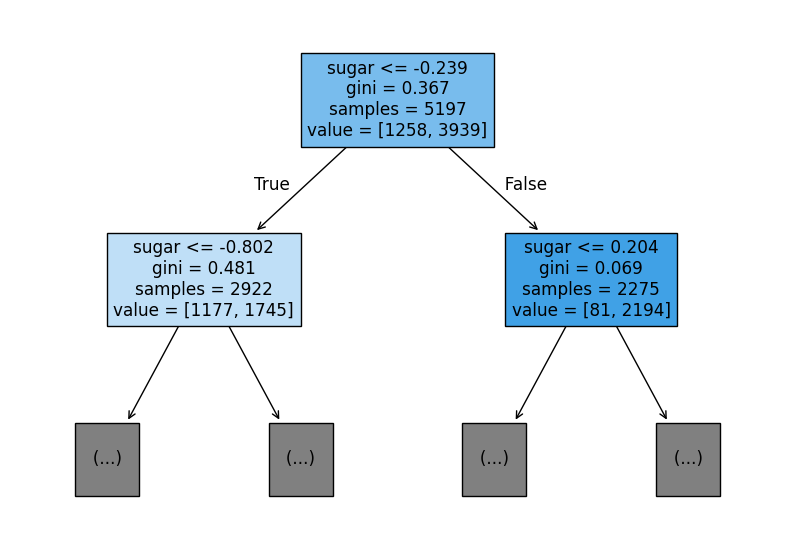

In [14]:
# 결정 트리 모델의 깊이가 1인 트리 시각화
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

### <b>문제 2)<b>

결정 트리는 oooo이 최대가 되도록 데이터를 나눈다.

정답) 부모의 불순도와 자녀의 불순도를 뺀 정보이익인 information gain을 최대로 한다.

### <b>문제 3)<b> 

클래스 비율에 따라 노드의 색이 달라지는 트리의 깊이가 1인 모델을 시각화하기 위한 코드를 작성하시오.

max_depth=1, filled=True

#### <b>가지치기<b>

In [15]:
# 가지치기를 통한 과적합 방지하기
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


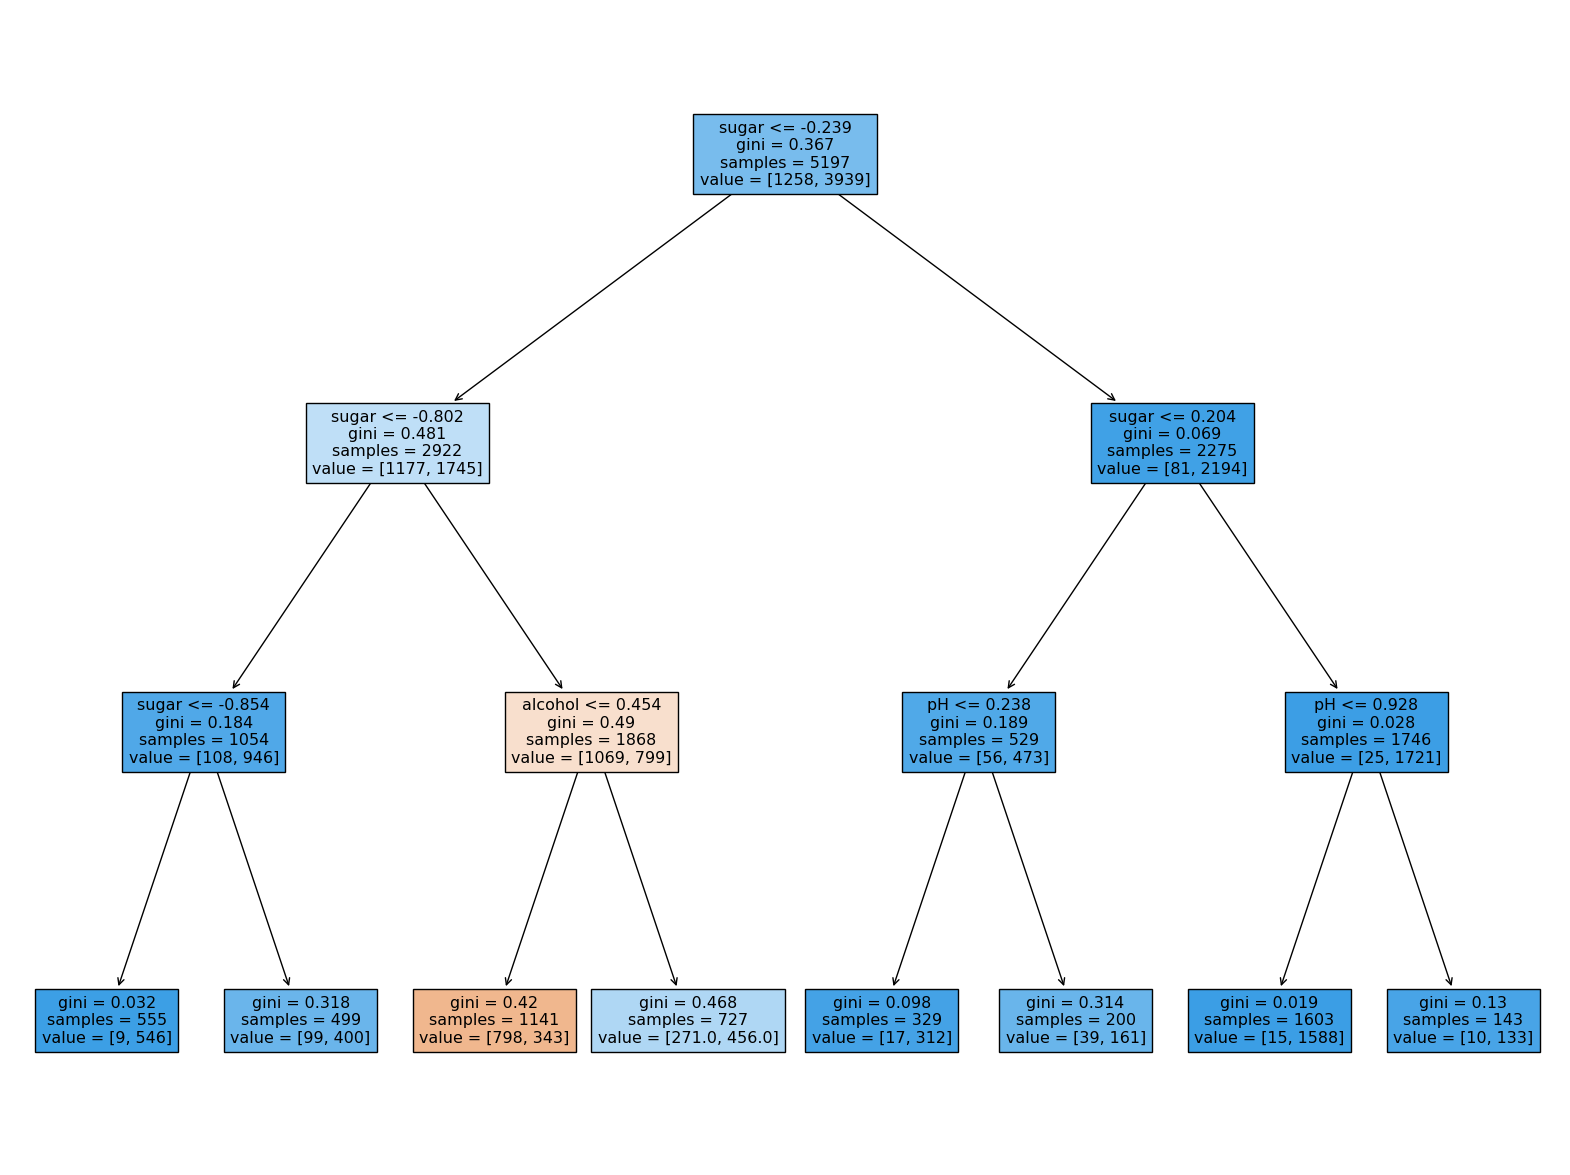

In [15]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [16]:
# 특성 중요도 계산
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]


### <b>문제 4)<b> 

결정 트리 모델의 특성 중요도를 계산해주는 코드를 작성하시오.

dt.feature_importances_

## <b>5-2 교차 검증과 그리드 서치<b>

### <b>검증 세트<b>

In [17]:
# 데이터 불러오기
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [18]:
# 데이터 준비
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [19]:
# 훈련 데이터와 테스트 데이터로 나누기
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

In [20]:
# 훈련 데이터를 다시 훈련 데이터와 검증 데이터로 나누기
sub_input, val_input, sub_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

In [21]:
# 훈련 데이터와 검증 데이터의 크기 확인
print(sub_input.shape, val_input.shape)

(4157, 3) (1040, 3)


In [22]:
# 훈련 데이터와 검증 데이터의 성능 확인
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(sub_input, sub_target)

print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

0.9971133028626413
0.864423076923077


### <b>교차 검증<b>

In [23]:
# 교차 검증
from sklearn.model_selection import cross_validate

scores = cross_validate(dt, train_input, train_target)
print(scores)

{'fit_time': array([0.00647283, 0.01260328, 0.00755548, 0.00699997, 0.00655365]), 'score_time': array([0.00100636, 0.00301266, 0.0010221 , 0.        , 0.00097513]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}


In [24]:
# 검증 세트의 평균값 계산
import numpy as np

print(np.mean(scores['test_score']))

0.855300214703487


In [26]:
# spliter을 이용한 교차검증
from sklearn.model_selection import StratifiedKFold

scores = cross_validate(dt, train_input, train_target, cv =StratifiedKFold())
print(np.mean(scores['test_score']))

0.855300214703487


### <b>문제 5)<b> 

분류 모델의 타깃 클래스를 골고루 나누기 위한 StratifiedKFold 클래스를 활용하여 교차 검증 코드를 작성하시오.

cross_validate(dt, train_input, train_target, cv =StratifiedKFold())

In [27]:
# 10-폴드 교차 검증
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_validate(dt, train_input, train_target, cv=splitter)
print(np.mean(scores['test_score']))

0.8574181117533719


### <b>하이퍼파라미터 튜닝<b>

In [28]:
from sklearn.model_selection import GridSearchCV

# 탐색할 매개변수 설정
params = {'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}

In [29]:
# 그리드 서치 진행 및 학습
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

In [30]:
# 최적의 모델을 통해 평가
dt = gs.best_estimator_
print(dt.score(train_input, train_target))

0.9615162593804117


In [31]:
# 최적의 모델 파라미터
print(gs.best_params_)

{'min_impurity_decrease': 0.0001}


In [32]:
# 검증 세트 성능
print(gs.cv_results_['mean_test_score'])

[0.86819297 0.86453617 0.86492226 0.86780891 0.86761605]


### <b>문제 6)<b> 

폴드 별 검증 세트의 성능을 확인할 수 있는 코드를 작성하시오.

print(gs.cv_results_['mean_test_score'])

In [33]:
# 최적의 검증 세트 성능에 대한 모델의 파라미터
best_index = np.argmax(gs.cv_results_['mean_test_score'])
print(gs.cv_results_['params'][best_index])

{'min_impurity_decrease': 0.0001}


In [34]:
# 탐색할 매개변수 설정
params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001),
          'max_depth': range(5, 20, 1),
          'min_samples_split': range(2, 100, 10)
          }

In [35]:
# 그리드 서치 진행 및 학습
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(2, 100, 10)})

In [36]:
# 최적의 모델 파라미터
print(gs.best_params_)

{'max_depth': 14, 'min_impurity_decrease': 0.0004, 'min_samples_split': 12}


In [37]:
# 검증 세트 최고 성능값
print(np.max(gs.cv_results_['mean_test_score']))

0.8683865773302731


#### <b>랜덤 서치<b>

In [38]:
from scipy.stats import uniform, randint

# 확률 분포 객체를 이용해 탐색할 매개변수 설정
params = {'min_impurity_decrease': uniform(0.0001, 0.001),
          'max_depth': randint(20, 50),
          'min_samples_split': randint(2, 25),
          'min_samples_leaf': randint(1, 25),
          }

In [39]:
# 랜덤 서치 전행 및 학습
from sklearn.model_selection import RandomizedSearchCV

gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params,
                        n_iter=100, n_jobs=-1, random_state=42)
gs.fit(train_input, train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002244FD23E50>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002244FD7D400>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002244E92EAF0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002244E0674C0>},
                   random_state=42)

In [40]:
# 최적의 모델 파라미터
print(gs.best_params_)

{'max_depth': 39, 'min_impurity_decrease': 0.00034102546602601173, 'min_samples_leaf': 7, 'min_samples_split': 13}


### <b>문제 7)<b> 

최적의 모델 파라미터를 반환하는 코드를 작성하시오.

In [41]:
# 검증 세트 최고 성능값
print(np.max(gs.cv_results_['mean_test_score']))

0.8695428296438884


In [42]:
# 최적의 모델을 통해 평가
dt = gs.best_estimator_

print(dt.score(test_input, test_target))

0.86


### <b>문제 8)<b>

랜덤서치를 어떨 때 이용하면 좋은지 서술하시오

정답) 하이퍼파라미터 튜닝시 위의 그리드 서치는 특정 값으로만 매개변수에 할당한다는 단점을 샘플링할 수 있는 확률 분포 객체를 전달하는 것으로 바꿈으로써 훨씬 다양한 값으로 비교할 수 있다.

## <b>5-3 트리의 앙상블<b>

### <b>랜덤포레스트<b>

In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# 데이터 준비
wine = pd.read_csv('https://bit.ly/wine_csv_data')

data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [44]:
# 랜덤 포레스트 모델링 및 교차검증
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9973541965122431 0.8905151032797809


In [45]:
# 특성 중요도 계산
rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.23167441 0.50039841 0.26792718]


### <b>문제 9)<b> 

결정 트리 모델의 특성 중요도 결과: [0.12345626 0.86862934 0.0079144 ]             
랜덤 포레스트 모델의 특성 중요도 결과: [0.23167441 0.50039841 0.26792718]
<br>  
랜덤 포레스트 모델은 결정 트리 모델에 비해 당도의 중요도는 감소하고 알코올 도수와 pH의 중요도가 증가했다. 그 이유와 이점에 대해 설명하시오.

정답) 랜덤 포레스트가 특성의 일부를 랜덤하게 선택하여 결정 트리를 훈련하기 때문이다. 그 결과 하나의 특성에 과도하게 집중하지 않고 좀 더 많은 특성이 훈련에 기여할 기회를 얻는다.

In [46]:
# OOB Sample을 이용한 평가
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)

rf.fit(train_input, train_target)
print(rf.oob_score_)

0.8934000384837406


### <b>문제 10)<b> 

OOB Sample의 의미를 작성하고 해당 샘플을 사용했을 때 이점을 작성하시오.

정답)부트스트랩에 포함되지 않은 데이터 셋을 OOB샘플이라고 한다. 이를 이용하면 교차 검증을 대신할 수 있어서 결과적으로 훈련 세트에 더 많은 샘플을 사용할 수 있다.

### <b>문제 11)<b> 

랜덤 포레스트와 엑스트라 트리의 차이점은 무엇인지 서술하시오.

정답) 엑스트라 트리는 부트스트랩을 사용하지 않고, 전체 훈련세트를 활용하여 트리를 만든다. 이는 가장 좋은 분할을 찾는 것이 아니라 무작위로 분할한다.

### <b>엑스트라트리<b>

In [47]:
# 엑스트라 트리 모델링 및 교차검증
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(et, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9974503966084433 0.8887848893166506


In [48]:
# 특성 중요도 계산
et.fit(train_input, train_target)
print(et.feature_importances_)

[0.20183568 0.52242907 0.27573525]


### <b>그레이디언트 부스팅<b>

In [49]:
# 그레이디언트 모델링 및 교차검증
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8881086892152563 0.8720430147331015


In [51]:
# n_estimators와 learning_rate에 따른 그레이디언트 부스팅 모델의 성능 변화

gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9464595437171814 0.8780082549788999


### <b>문제 12)<b> 

트리의 개수가 500개, 학습률이 0.2인 GradientBoostingClassifier 객체를 생성하는 코드를 작성하시오.

In [52]:
# 특성 중요도 계산
gb.fit(train_input, train_target)
print(gb.feature_importances_)

[0.15882696 0.6799705  0.16120254]


### <b>히스토그램 기반 부스팅<b>

In [53]:
# 히스토그램 기반 그레이디언트 부스팅 모델링 및 교차검증
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9321723946453317 0.8801241948619236


In [54]:
# 특성 중요도 계산
from sklearn.inspection import permutation_importance

hgb.fit(train_input, train_target)
result = permutation_importance(hgb, train_input, train_target, n_repeats=10,
                                random_state=42, n_jobs=-1)
print(result.importances_mean)

[0.08876275 0.23438522 0.08027708]


In [55]:
# test set에 대한 특성 중요도 계산
result = permutation_importance(hgb, test_input, test_target, n_repeats=10,
                                random_state=42, n_jobs=-1)
print(result.importances_mean)

[0.05969231 0.20238462 0.049     ]


In [58]:
# test set에 대한 모델 성능 확인
hgb.score(test_input, test_target)

0.8723076923076923

#### <b>XGBoost<b>

In [63]:
# XGBoost 모델링 및 교차검증
from xgboost import XGBClassifier

xgb = XGBClassifier(tree_method= 'hist', random_state=42)
scores = cross_validate(xgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9558403027491312 0.8782000074035686


### <b>문제 13)<b> 

XGBoost 모델에서 히스토그램 기반 그레이디언트 부스팅을 사용하기 위한 코드를 작성하시오.

#### <b>LightGBM<b>

In [64]:
# LightGBM 모델링 및 교차검증
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(random_state=42)
scores = cross_validate(lgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.935828414851749 0.8801251203079884
